<a href="https://colab.research.google.com/github/harsh-ux/PRML-Mini_Project/blob/main/mask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [35]:
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import GaussianNB
import cv2
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import lightgbm as ltb
from sklearn.metrics import accuracy_score, classification_report

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = '/content/drive/My Drive/ML/Minor Project/'

In [4]:
import os
print(os.path)

mask_dir = os.path.join(path, 'maskedfinal/')
nomask_dir = os.path.join(path, 'nonmaskedfinal/')

<module 'posixpath' from '/usr/lib/python3.7/posixpath.py'>


#Data Extraction

In [5]:
mask_img = os.listdir(mask_dir)
print(mask_img[:10])
nomask_img = os.listdir(nomask_dir)
print(nomask_img[:10])

['0_0_22 (13).jpg', '0_0_2 (106).jpg', '0_0_1 (84).jpg', '1_1_14 (2).jpg', '0_0_0 (58).jpg', '0_0_11 (15).jpg', '0_0_+·+ó 2020-02-24 205216.png', '0_0_6 (13).jpg', '0_0_1 (54).jpg', '1_0_19 (5).jpg']
['1_0_wuzun_0071.jpg', '1_0_yangying_0187.jpg', '1_0_zhangbinbin_0055.jpg', '0_0_xuejianing_0215.jpg', '1_0_xulu1_0136.jpg', '1_0_yanggongru_0179.jpg', '0_0_wujunyu_0126.jpg', '0_0_renquan_0014.jpg', '1_0_yanggongru_0133.jpg', '1_0_xinzhilei_0209.jpg']


In [7]:
print(mask_img[884])

1_0_11 (4).jpg


In [6]:
data_mask = []
for i in mask_img:
    data_mask.append(mask_dir+i)
print(data_mask)

['/content/drive/My Drive/ML/Minor Project/maskedfinal/0_0_22 (13).jpg', '/content/drive/My Drive/ML/Minor Project/maskedfinal/0_0_2 (106).jpg', '/content/drive/My Drive/ML/Minor Project/maskedfinal/0_0_1 (84).jpg', '/content/drive/My Drive/ML/Minor Project/maskedfinal/1_1_14 (2).jpg', '/content/drive/My Drive/ML/Minor Project/maskedfinal/0_0_0 (58).jpg', '/content/drive/My Drive/ML/Minor Project/maskedfinal/0_0_11 (15).jpg', '/content/drive/My Drive/ML/Minor Project/maskedfinal/0_0_+·+ó 2020-02-24 205216.png', '/content/drive/My Drive/ML/Minor Project/maskedfinal/0_0_6 (13).jpg', '/content/drive/My Drive/ML/Minor Project/maskedfinal/0_0_1 (54).jpg', '/content/drive/My Drive/ML/Minor Project/maskedfinal/1_0_19 (5).jpg', '/content/drive/My Drive/ML/Minor Project/maskedfinal/0_0_2 (59).jpg', '/content/drive/My Drive/ML/Minor Project/maskedfinal/0_0_0 (57).jpg', '/content/drive/My Drive/ML/Minor Project/maskedfinal/0_0_0 (69).jpg', '/content/drive/My Drive/ML/Minor Project/maskedfinal/1_

In [7]:
data_nonmask = []
for i in nomask_img:
    data_nonmask.append(nomask_dir+i)
print(data_nonmask)

['/content/drive/My Drive/ML/Minor Project/nonmaskedfinal/1_0_wuzun_0071.jpg', '/content/drive/My Drive/ML/Minor Project/nonmaskedfinal/1_0_yangying_0187.jpg', '/content/drive/My Drive/ML/Minor Project/nonmaskedfinal/1_0_zhangbinbin_0055.jpg', '/content/drive/My Drive/ML/Minor Project/nonmaskedfinal/0_0_xuejianing_0215.jpg', '/content/drive/My Drive/ML/Minor Project/nonmaskedfinal/1_0_xulu1_0136.jpg', '/content/drive/My Drive/ML/Minor Project/nonmaskedfinal/1_0_yanggongru_0179.jpg', '/content/drive/My Drive/ML/Minor Project/nonmaskedfinal/0_0_wujunyu_0126.jpg', '/content/drive/My Drive/ML/Minor Project/nonmaskedfinal/0_0_renquan_0014.jpg', '/content/drive/My Drive/ML/Minor Project/nonmaskedfinal/1_0_yanggongru_0133.jpg', '/content/drive/My Drive/ML/Minor Project/nonmaskedfinal/1_0_xinzhilei_0209.jpg', '/content/drive/My Drive/ML/Minor Project/nonmaskedfinal/1_0_yangying_0039.jpg', '/content/drive/My Drive/ML/Minor Project/nonmaskedfinal/1_0_wuzongxian_0155.jpg', '/content/drive/My Driv

In [ ]:
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array

img = data[0]
img = image.load_img(img, target_size = (64, 64))
plt.imshow(img)
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
print(img.shape)

In [11]:
print(data_mask[900])
label = 1
ime = cv2.imread(data_mask[900])
ime = cv2.cvtColor(ime, cv2.COLOR_BGR2GRAY)
ime = cv2.resize(ime, (64,64))
ime = ime.flatten()

/content/drive/My Drive/ML/Minor Project/maskedfinal/0_0_12 (26).jpg


error: ignored

In [12]:
dataset = []
labels = []
from keras.preprocessing import image
for i in data_mask:
  print(i)
  label = 1
  ime = cv2.imread(i)
  if(ime is not None):
    ime = cv2.cvtColor(ime, cv2.COLOR_BGR2GRAY)
    ime = cv2.resize(ime, (64,64))
    ime = ime.flatten()
    dataset.append(ime)
    labels.append(label)
  # ime = image.load_img(i, target_size=(64, 64))
  # ime = image.img_to_array(ime)
  # ime = preprocess_input(ime)
  

/content/drive/My Drive/ML/Minor Project/maskedfinal/0_0_22 (13).jpg
/content/drive/My Drive/ML/Minor Project/maskedfinal/0_0_2 (106).jpg
/content/drive/My Drive/ML/Minor Project/maskedfinal/0_0_1 (84).jpg
/content/drive/My Drive/ML/Minor Project/maskedfinal/1_1_14 (2).jpg
/content/drive/My Drive/ML/Minor Project/maskedfinal/0_0_0 (58).jpg
/content/drive/My Drive/ML/Minor Project/maskedfinal/0_0_11 (15).jpg
/content/drive/My Drive/ML/Minor Project/maskedfinal/0_0_+·+ó 2020-02-24 205216.png
/content/drive/My Drive/ML/Minor Project/maskedfinal/0_0_6 (13).jpg
/content/drive/My Drive/ML/Minor Project/maskedfinal/0_0_1 (54).jpg
/content/drive/My Drive/ML/Minor Project/maskedfinal/1_0_19 (5).jpg
/content/drive/My Drive/ML/Minor Project/maskedfinal/0_0_2 (59).jpg
/content/drive/My Drive/ML/Minor Project/maskedfinal/0_0_0 (57).jpg
/content/drive/My Drive/ML/Minor Project/maskedfinal/0_0_0 (69).jpg
/content/drive/My Drive/ML/Minor Project/maskedfinal/1_0_5 (3).jpg
/content/drive/My Drive/ML/Mi

In [50]:
dataset1 = []
labels1 = []
from keras.preprocessing import image
for i in data_nonmask:
  print(i)
  label = 0
  ime = cv2.imread(i)
  if(ime is not None):
    ime = cv2.cvtColor(ime, cv2.COLOR_BGR2GRAY)
    ime = cv2.resize(ime, (64,64))
    ime = ime.flatten()
    dataset1.append(ime)
    labels1.append(label)

/content/drive/My Drive/ML/Minor Project/nonmaskedfinal/1_0_wuzun_0071.jpg
/content/drive/My Drive/ML/Minor Project/nonmaskedfinal/1_0_yangying_0187.jpg
/content/drive/My Drive/ML/Minor Project/nonmaskedfinal/1_0_zhangbinbin_0055.jpg
/content/drive/My Drive/ML/Minor Project/nonmaskedfinal/0_0_xuejianing_0215.jpg
/content/drive/My Drive/ML/Minor Project/nonmaskedfinal/1_0_xulu1_0136.jpg
/content/drive/My Drive/ML/Minor Project/nonmaskedfinal/1_0_yanggongru_0179.jpg
/content/drive/My Drive/ML/Minor Project/nonmaskedfinal/0_0_wujunyu_0126.jpg
/content/drive/My Drive/ML/Minor Project/nonmaskedfinal/0_0_renquan_0014.jpg
/content/drive/My Drive/ML/Minor Project/nonmaskedfinal/1_0_yanggongru_0133.jpg
/content/drive/My Drive/ML/Minor Project/nonmaskedfinal/1_0_xinzhilei_0209.jpg
/content/drive/My Drive/ML/Minor Project/nonmaskedfinal/1_0_yangying_0039.jpg
/content/drive/My Drive/ML/Minor Project/nonmaskedfinal/1_0_wuzongxian_0155.jpg
/content/drive/My Drive/ML/Minor Project/nonmaskedfinal/1_0_

In [51]:
print(len(dataset), len(labels))

1374 1374


In [54]:
print(dataset1[0].shape)

(4096,)


In [52]:
print(len(dataset1), len(labels1))

2487 2487


In [56]:
nonmask_df = pd.DataFrame(data=dataset1)

In [58]:
nonmask_df['Label'] = labels1

In [59]:
nonmask_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4057,4058,4059,4060,4061,4062,4063,4064,4065,4066,4067,4068,4069,4070,4071,4072,4073,4074,4075,4076,4077,4078,4079,4080,4081,4082,4083,4084,4085,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095,Label
0,9,9,9,12,14,21,25,23,15,9,8,12,19,21,23,24,24,22,19,24,30,35,38,39,40,44,46,44,38,38,38,37,36,32,34,35,37,34,38,43,...,225,225,223,223,223,222,222,224,221,222,216,200,152,80,91,151,191,203,208,208,214,212,195,158,133,117,100,94,100,109,114,111,109,98,77,46,63,74,61,0
1,206,205,203,200,199,199,193,192,189,187,184,184,183,181,182,182,182,182,183,183,183,184,183,182,181,178,178,177,181,180,180,182,182,183,179,173,176,174,173,177,...,129,129,129,129,130,133,137,140,141,144,146,149,151,154,163,171,177,182,185,187,188,191,193,195,198,202,204,216,234,244,245,245,247,249,248,248,247,246,247,0
2,30,25,28,33,35,34,33,34,34,33,34,38,39,36,31,38,39,37,32,29,29,30,30,31,36,38,36,32,27,25,27,28,32,35,35,32,28,29,33,37,...,165,163,163,166,169,165,165,158,147,136,135,133,126,119,124,126,133,144,154,157,133,100,75,63,61,63,63,58,57,57,53,52,53,53,52,49,50,51,53,0
3,253,253,249,239,197,155,137,137,134,135,135,135,135,135,134,133,132,130,130,127,125,124,123,120,119,120,123,120,118,120,120,126,123,123,124,118,118,122,121,125,...,100,104,102,137,169,181,190,192,194,198,203,204,207,208,208,210,214,216,216,214,218,221,219,220,221,224,225,224,222,223,222,222,222,221,218,216,216,211,204,0
4,44,44,43,42,43,45,46,47,48,49,48,53,55,53,50,49,53,63,71,75,82,90,95,96,92,86,83,83,82,79,78,74,75,84,93,107,122,133,144,151,...,229,233,235,234,238,240,240,243,245,247,248,251,251,251,251,252,253,254,254,254,254,254,254,253,253,254,252,251,251,249,247,243,239,233,229,205,164,118,86,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2482,26,26,26,26,27,26,27,29,29,29,27,27,29,31,33,33,31,29,29,31,33,38,43,45,43,38,38,33,31,29,25,25,26,27,28,30,28,31,30,28,...,59,70,79,86,90,96,100,103,108,115,117,119,119,116,116,117,116,118,115,115,107,71,88,129,146,155,159,160,149,150,154,156,156,154,151,148,148,154,143,0
2483,23,26,20,18,24,21,17,15,20,22,20,20,21,20,20,21,22,25,27,31,34,35,34,31,34,35,33,34,32,30,33,38,36,33,39,33,35,40,38,43,...,65,63,68,76,80,84,88,92,97,100,98,97,96,98,100,102,107,113,129,150,178,190,200,199,188,187,197,205,208,198,173,180,199,204,202,200,189,189,182,0
2484,64,60,56,37,31,40,53,56,63,69,71,66,54,50,53,60,62,64,66,74,81,78,79,77,75,80,68,61,66,66,64,58,53,80,105,117,115,111,105,100,...,86,86,87,86,85,84,82,83,83,84,85,86,83,82,85,86,84,88,93,95,100,111,119,130,141,151,156,163,186,224,232,235,230,213,193,148,65,42,34,0
2485,233,193,135,91,68,56,54,53,32,17,10,11,16,12,12,14,18,19,21,28,31,32,37,42,47,58,72,86,101,118,134,148,154,165,168,170,170,168,166,162,...,229,229,229,226,220,215,210,201,192,182,176,172,164,153,151,152,157,167,179,186,191,197,198,196,196,196,194,192,177,133,77,40,30,23,15,19,23,21,13,0


In [60]:
mask_df = pd.DataFrame(data=dataset)

In [75]:
mask_df.to_csv('mask.csv')

In [76]:
from google.colab import files
files.download('mask.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [78]:
nonmask_df.to_csv('nonmask.csv')
from google.colab import files
files.download('nonmask.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [77]:
from google.colab import files
files.download('traindata.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [61]:
mask_df['Label'] = labels

In [62]:
mask_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4057,4058,4059,4060,4061,4062,4063,4064,4065,4066,4067,4068,4069,4070,4071,4072,4073,4074,4075,4076,4077,4078,4079,4080,4081,4082,4083,4084,4085,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095,Label
0,19,23,43,63,62,56,46,38,34,52,45,32,34,47,70,100,139,176,193,206,216,219,221,220,220,221,223,222,221,222,226,231,240,234,215,182,156,110,74,48,...,133,129,139,142,140,150,158,160,160,163,170,183,195,200,201,201,201,200,199,198,196,198,199,202,206,207,210,215,220,226,159,24,2,4,3,4,7,5,3,1
1,59,59,59,54,51,55,62,71,67,62,56,54,56,55,56,61,66,73,86,100,113,123,129,127,124,128,131,134,137,140,147,154,163,165,164,160,156,152,144,132,...,168,169,175,177,176,182,187,189,188,186,183,181,179,180,182,179,175,171,160,141,149,155,140,100,34,22,23,31,33,26,25,25,23,22,22,21,21,23,24,1
2,38,29,31,42,37,26,21,22,20,25,28,33,50,67,73,82,98,81,83,99,97,101,111,121,124,123,121,117,119,121,122,123,124,121,120,125,123,120,123,120,...,26,23,19,15,12,11,12,11,11,14,15,15,19,20,21,21,24,30,80,143,162,162,161,165,163,159,158,156,159,155,147,121,64,38,51,51,54,54,51,1
3,215,218,212,206,202,205,191,178,193,201,201,202,204,207,204,193,192,168,134,106,116,147,174,199,214,220,221,222,225,226,226,228,223,223,222,225,224,227,223,221,...,179,177,176,178,179,179,178,179,181,181,180,179,177,177,176,174,172,173,170,165,160,151,146,146,143,146,141,133,131,121,100,65,37,23,15,13,17,18,19,1
4,127,126,124,121,117,117,115,111,109,107,102,92,83,70,61,62,65,71,78,85,90,96,96,97,98,99,100,101,103,103,102,101,100,99,97,96,95,93,91,91,...,142,140,139,140,139,138,139,141,143,147,151,154,159,165,170,176,181,184,186,190,194,197,202,207,210,212,215,219,221,222,225,226,228,230,232,231,232,239,234,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1369,32,33,37,31,32,31,30,36,39,46,51,60,78,101,96,119,126,133,137,142,144,152,154,161,163,167,172,176,179,185,188,190,194,203,201,199,195,187,183,173,...,74,70,65,57,53,50,45,43,37,44,59,82,71,9,12,16,16,18,16,14,17,50,147,146,45,38,75,43,22,30,21,18,17,16,16,17,17,17,17,1
1370,117,136,154,173,189,204,210,215,219,223,227,231,236,238,239,239,239,237,235,234,235,237,237,237,239,239,237,236,235,235,234,235,236,236,236,237,237,237,237,238,...,36,36,36,36,36,39,43,44,42,41,43,47,48,48,48,50,51,47,44,56,92,141,191,227,221,220,219,214,205,198,195,195,199,206,209,211,214,215,213,1
1371,208,220,213,213,227,188,167,66,5,3,5,8,11,14,16,18,20,21,22,22,24,26,30,27,29,31,33,33,36,39,34,43,39,42,35,37,37,36,34,37,...,211,213,214,216,217,218,219,217,217,218,216,215,214,209,208,217,237,237,215,187,178,154,179,196,192,175,169,178,186,163,190,213,183,163,176,177,150,161,174,1
1372,77,99,131,166,186,203,209,211,217,219,219,216,213,211,211,211,211,212,213,212,211,209,208,208,208,209,208,206,205,204,202,203,203,203,201,203,207,211,210,209,...,25,25,25,26,27,28,28,28,27,27,26,26,26,27,28,28,27,26,26,26,26,27,35,17,30,18,50,133,159,163,154,90,66,84,93,125,186,231,239,1


In [66]:
main_df = pd.concat([nonmask_df, mask_df])

In [67]:
main_df.reset_index(drop=True)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4057,4058,4059,4060,4061,4062,4063,4064,4065,4066,4067,4068,4069,4070,4071,4072,4073,4074,4075,4076,4077,4078,4079,4080,4081,4082,4083,4084,4085,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095,Label
0,9,9,9,12,14,21,25,23,15,9,8,12,19,21,23,24,24,22,19,24,30,35,38,39,40,44,46,44,38,38,38,37,36,32,34,35,37,34,38,43,...,225,225,223,223,223,222,222,224,221,222,216,200,152,80,91,151,191,203,208,208,214,212,195,158,133,117,100,94,100,109,114,111,109,98,77,46,63,74,61,0
1,206,205,203,200,199,199,193,192,189,187,184,184,183,181,182,182,182,182,183,183,183,184,183,182,181,178,178,177,181,180,180,182,182,183,179,173,176,174,173,177,...,129,129,129,129,130,133,137,140,141,144,146,149,151,154,163,171,177,182,185,187,188,191,193,195,198,202,204,216,234,244,245,245,247,249,248,248,247,246,247,0
2,30,25,28,33,35,34,33,34,34,33,34,38,39,36,31,38,39,37,32,29,29,30,30,31,36,38,36,32,27,25,27,28,32,35,35,32,28,29,33,37,...,165,163,163,166,169,165,165,158,147,136,135,133,126,119,124,126,133,144,154,157,133,100,75,63,61,63,63,58,57,57,53,52,53,53,52,49,50,51,53,0
3,253,253,249,239,197,155,137,137,134,135,135,135,135,135,134,133,132,130,130,127,125,124,123,120,119,120,123,120,118,120,120,126,123,123,124,118,118,122,121,125,...,100,104,102,137,169,181,190,192,194,198,203,204,207,208,208,210,214,216,216,214,218,221,219,220,221,224,225,224,222,223,222,222,222,221,218,216,216,211,204,0
4,44,44,43,42,43,45,46,47,48,49,48,53,55,53,50,49,53,63,71,75,82,90,95,96,92,86,83,83,82,79,78,74,75,84,93,107,122,133,144,151,...,229,233,235,234,238,240,240,243,245,247,248,251,251,251,251,252,253,254,254,254,254,254,254,253,253,254,252,251,251,249,247,243,239,233,229,205,164,118,86,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3856,32,33,37,31,32,31,30,36,39,46,51,60,78,101,96,119,126,133,137,142,144,152,154,161,163,167,172,176,179,185,188,190,194,203,201,199,195,187,183,173,...,74,70,65,57,53,50,45,43,37,44,59,82,71,9,12,16,16,18,16,14,17,50,147,146,45,38,75,43,22,30,21,18,17,16,16,17,17,17,17,1
3857,117,136,154,173,189,204,210,215,219,223,227,231,236,238,239,239,239,237,235,234,235,237,237,237,239,239,237,236,235,235,234,235,236,236,236,237,237,237,237,238,...,36,36,36,36,36,39,43,44,42,41,43,47,48,48,48,50,51,47,44,56,92,141,191,227,221,220,219,214,205,198,195,195,199,206,209,211,214,215,213,1
3858,208,220,213,213,227,188,167,66,5,3,5,8,11,14,16,18,20,21,22,22,24,26,30,27,29,31,33,33,36,39,34,43,39,42,35,37,37,36,34,37,...,211,213,214,216,217,218,219,217,217,218,216,215,214,209,208,217,237,237,215,187,178,154,179,196,192,175,169,178,186,163,190,213,183,163,176,177,150,161,174,1
3859,77,99,131,166,186,203,209,211,217,219,219,216,213,211,211,211,211,212,213,212,211,209,208,208,208,209,208,206,205,204,202,203,203,203,201,203,207,211,210,209,...,25,25,25,26,27,28,28,28,27,27,26,26,26,27,28,28,27,26,26,26,26,27,35,17,30,18,50,133,159,163,154,90,66,84,93,125,186,231,239,1


In [68]:
main_df.sample(frac=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4057,4058,4059,4060,4061,4062,4063,4064,4065,4066,4067,4068,4069,4070,4071,4072,4073,4074,4075,4076,4077,4078,4079,4080,4081,4082,4083,4084,4085,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095,Label
781,41,29,20,23,21,18,20,22,32,27,24,16,13,12,12,12,12,13,14,15,16,17,16,23,23,31,44,27,34,38,48,37,43,47,66,51,54,66,53,67,...,40,47,40,41,43,36,40,65,91,93,88,85,90,95,92,98,108,118,129,132,134,145,150,147,156,166,166,175,177,181,186,192,196,193,196,202,201,201,203,1
2237,3,2,2,2,2,5,8,9,4,5,7,8,10,11,11,12,10,9,9,7,6,8,10,12,13,13,15,17,14,11,7,5,7,9,6,2,3,3,3,4,...,176,166,158,140,133,127,116,108,104,95,79,67,52,30,21,19,27,30,26,23,23,25,26,25,28,29,29,28,27,27,27,27,25,24,25,26,24,26,27,0
1602,37,36,35,36,37,41,46,48,58,66,62,66,70,71,68,67,62,54,46,46,54,54,53,44,46,50,54,56,58,62,63,51,47,50,53,41,40,45,46,48,...,132,141,143,148,155,155,151,148,150,150,147,148,135,107,84,80,105,77,96,166,177,151,156,171,184,193,192,191,190,191,190,189,190,190,188,188,187,187,187,0
333,31,32,32,40,44,45,47,49,50,52,57,61,63,64,68,67,68,69,69,66,73,77,79,81,88,96,105,114,125,135,135,132,124,116,108,100,92,84,80,75,...,127,134,137,140,144,150,155,156,155,155,154,153,151,152,153,151,149,147,147,145,141,135,131,122,112,108,111,110,105,104,102,97,92,90,93,87,82,75,66,0
605,37,38,37,39,37,37,36,32,32,32,30,27,25,21,19,16,15,15,14,18,26,34,38,39,41,41,42,39,39,36,30,27,28,29,29,30,31,30,31,31,...,115,111,104,102,97,92,89,91,93,95,98,100,97,92,86,68,48,39,29,25,25,26,23,18,12,11,10,7,7,9,9,7,8,10,9,7,7,7,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,69,67,65,65,67,68,67,65,63,64,64,66,70,73,74,77,81,83,85,89,90,94,103,114,119,122,129,130,136,136,139,141,143,141,138,137,133,126,113,105,...,188,190,193,195,195,196,196,196,197,198,198,194,191,193,195,195,196,196,196,197,197,201,204,205,204,200,189,176,158,136,112,77,41,27,28,33,34,33,33,1
2336,41,40,37,40,45,52,53,59,67,74,78,83,84,89,93,100,107,112,114,110,107,101,104,109,119,119,112,98,89,79,71,60,51,41,36,37,39,43,51,63,...,10,11,14,15,13,16,22,37,47,62,67,68,71,79,87,96,97,93,87,86,90,87,78,74,69,70,73,78,82,77,69,61,51,49,51,46,38,32,27,0
682,115,114,98,94,84,78,76,75,76,79,77,74,65,62,63,66,68,72,74,78,83,90,100,107,113,121,126,129,134,134,129,125,120,114,112,106,102,107,97,87,...,96,100,102,105,102,101,97,79,63,45,38,43,83,128,127,118,111,104,102,94,92,99,91,73,63,49,50,62,66,53,29,17,16,15,13,13,13,13,15,0
380,42,46,45,39,30,34,39,35,36,39,35,43,42,41,40,41,35,48,28,37,29,33,42,41,37,30,44,39,30,39,35,36,37,35,26,23,40,31,28,29,...,125,128,125,121,114,113,116,118,116,113,110,104,100,100,100,99,100,103,110,120,127,125,123,122,120,117,117,115,119,128,139,149,155,164,163,161,161,160,160,1


In [69]:
main_df.to_csv('imagedata.csv')

In [72]:
train_df,test_df = train_test_split(main_df, test_size=0.1)

In [74]:
train_df.to_csv('traindata.csv')
test_df.to_csv('testdata.csv')

#DL Models

##MobileNet

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import os

In [37]:
INIT_LR = 1e-6
EPOCHS = 30
BS = 32

In [10]:
datannmask = []
labelsnnmask = []

In [11]:
for imagePath in data_mask :
  label=1
  ime = cv2.imread(imagePath)
  if (ime is not None):
    image = load_img(imagePath, target_size=(224, 224))
    image = img_to_array(image)
    image = preprocess_input(image)
    datannmask.append(image)
    labelsnnmask.append(label)

In [12]:
datannnonmask = []
labelsnnnonmask = []

In [13]:
for imagePath in data_nonmask :
  label=0
  ime = cv2.imread(imagePath)
  if (ime is not None):
    image = load_img(imagePath, target_size=(224, 224))
    image = img_to_array(image)
    image = preprocess_input(image)
    datannnonmask.append(image)
    labelsnnnonmask.append(label)

In [14]:
aug = ImageDataGenerator(
	rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

In [33]:
# load the MobileNetV2 network, ensuring the head FC layer sets are
# left off
baseModel = MobileNetV2(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224,224,3)))

# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)

# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)

In [35]:
for layer in baseModel.layers:
	layer.trainable = False

# compile our model
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])

[INFO] compiling model...


In [17]:
# train_mo = pd.read_csv('/content/traindata.csv')
# test_mo = pd.read_csv('/content/testdata.csv')

In [18]:
# trainY = train_mo['Label'].to_numpy()
# testY = test_mo['Label'].to_numpy()

In [19]:
# trainX = train_mo.drop(['Label'], axis=1)
# testX = test_mo.drop(['Label'], axis=1)
# trainX = trainX.to_numpy()
# testX = testX.to_numpy()

In [26]:
datafinal = datannnonmask + datannmask

In [27]:
labelsfinal = labelsnnnonmask + labelsnnmask

In [28]:
datafinal = np.array(datafinal, dtype="float32")
labelsfinal = np.array(labelsfinal)

In [29]:
from sklearn.utils import shuffle
datafinal, labelsfinal = shuffle(datafinal, labelsfinal, random_state=0)

In [30]:
labelsfinal = to_categorical(labelsfinal)

In [31]:
(trainX, testX, trainY, testY) = train_test_split(datafinal, labelsfinal,
	test_size=0.20, stratify=labelsfinal, random_state=42)

In [38]:
print("[INFO] training head...")
H = model.fit(
	aug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS)

[INFO] training head...
Epoch 1/30
97/97 [==============================] - 31s 322ms/step - loss: 0.5576 - accuracy: 0.7600 - val_loss: 0.4898 - val_accuracy: 0.8182
Epoch 2/30
97/97 [==============================] - 31s 322ms/step - loss: 0.5427 - accuracy: 0.7755 - val_loss: 0.4789 - val_accuracy: 0.8220
Epoch 3/30
97/97 [==============================] - 31s 323ms/step - loss: 0.5261 - accuracy: 0.7901 - val_loss: 0.4684 - val_accuracy: 0.8284
Epoch 4/30
97/97 [==============================] - 31s 322ms/step - loss: 0.5117 - accuracy: 0.7966 - val_loss: 0.4581 - val_accuracy: 0.8361
Epoch 5/30
97/97 [==============================] - 31s 322ms/step - loss: 0.5031 - accuracy: 0.8043 - val_loss: 0.4479 - val_accuracy: 0.8476
Epoch 6/30
97/97 [==============================] - 31s 323ms/step - loss: 0.4861 - accuracy: 0.8153 - val_loss: 0.4383 - val_accuracy: 0.8476
Epoch 7/30
97/97 [==============================] - 31s 323ms/step - loss: 0.4804 - accuracy: 0.8176 - val_loss: 0.428

In [40]:
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)

# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=['0','1']))

[INFO] evaluating network...
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       497
           1       0.96      0.80      0.87       284

    accuracy                           0.92       781
   macro avg       0.93      0.89      0.90       781
weighted avg       0.92      0.92      0.91       781



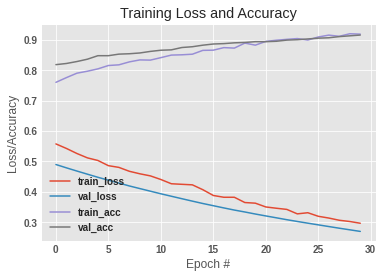

In [41]:
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

##CNN

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/My Drive/Minor Project/'

In [ ]:
import os
print(os.path)

mask_dir = os.path.join(path, 'maskedfinal/')
nomask_dir = os.path.join(path, 'nonmaskedfinal/')

<module 'posixpath' from '/usr/lib/python3.7/posixpath.py'>


In [ ]:
mask_img = os.listdir(mask_dir)
print(mask_img[:10])
nomask_img = os.listdir(nomask_dir)
print(nomask_img[:10])

['0_0_22 (13).jpg', '0_0_2 (106).jpg', '0_0_1 (84).jpg', '1_1_14 (2).jpg', '0_0_0 (58).jpg', '0_0_11 (15).jpg', '0_0_+·+ó 2020-02-24 205216.png', '0_0_6 (13).jpg', '0_0_1 (54).jpg', '1_0_19 (5).jpg']
['1_0_wuzun_0071.jpg', '1_0_yangying_0187.jpg', '1_0_zhangbinbin_0055.jpg', '0_0_xuejianing_0215.jpg', '1_0_xulu1_0136.jpg', '1_0_yanggongru_0179.jpg', '0_0_wujunyu_0126.jpg', '0_0_renquan_0014.jpg', '1_0_yanggongru_0133.jpg', '1_0_xinzhilei_0209.jpg']


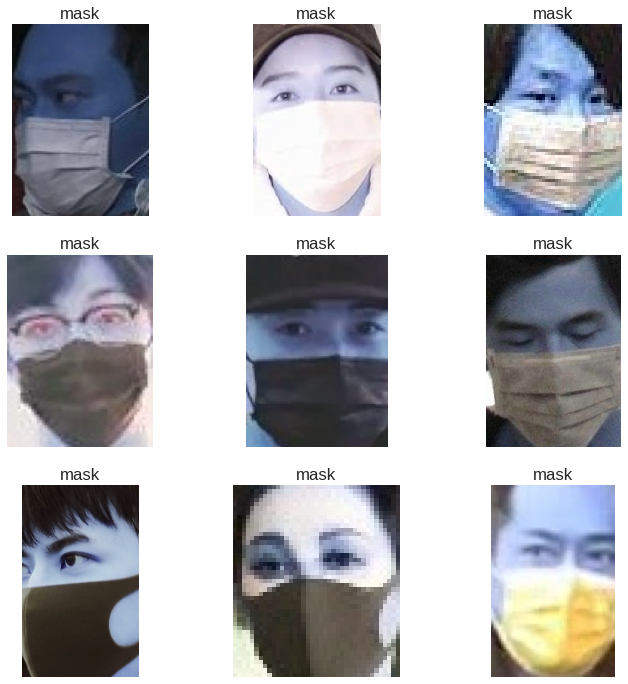

In [ ]:
import random
import cv2
random.seed(42)
import matplotlib.image as mpimg
plt.figure(figsize=(12, 12))
ran_num = []
for i in range(0,9):
    n = random.randint(0,len(mask_img))
    ran_num.append(n)
for i in range(9):
    ax= plt.subplot(3, 3, i + 1)
    img = cv2.imread(mask_dir+mask_img[ran_num[i]])
    plt.imshow(img)
    plt.title("mask")
    plt.axis("off")

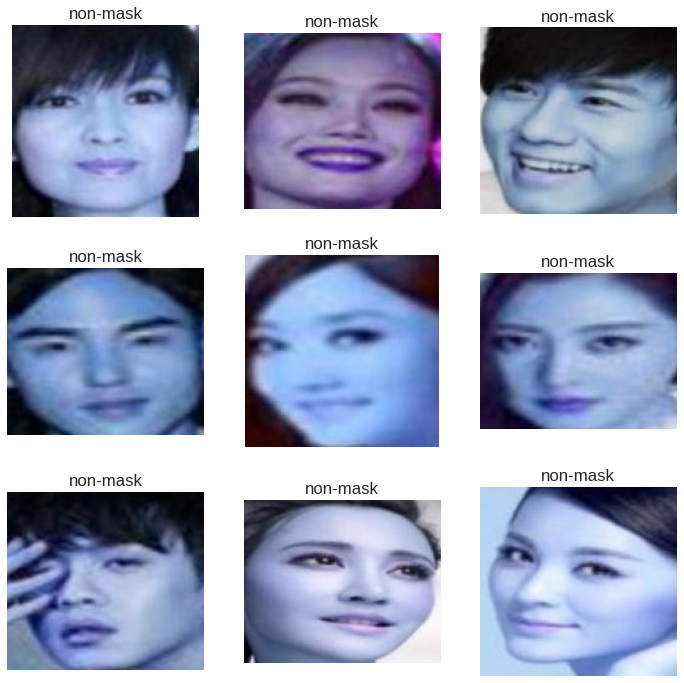

In [ ]:
plt.figure(figsize=(12, 12))
ran_num = []
for i in range(0,9):
    n = random.randint(0,len(nomask_img))
    ran_num.append(n)
for i in range(9):
    ax= plt.subplot(3, 3, i + 1)
    img = cv2.imread(nomask_dir+nomask_img[ran_num[i]])
    plt.imshow(img)
    plt.title("non-mask")
    plt.axis("off")

In [ ]:
import tensorflow as tf
import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
train = tf.keras.preprocessing.image_dataset_from_directory(path,validation_split=0.3,subset="training",shuffle=True,seed=42,image_size= (160,160),batch_size=32)
test= tf.keras.preprocessing.image_dataset_from_directory(path,validation_split=0.3,subset="validation",shuffle=True,seed=42,image_size= (160,160),batch_size=32)

Found 6465 files belonging to 3 classes.
Using 4526 files for training.
Found 6465 files belonging to 3 classes.
Using 1939 files for validation.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, BatchNormalization
import tensorflow as tf
from tensorflow.keras.optimizers import SGD, Adam
tf.random.set_seed(42)

def define_model():
    model = Sequential()
    model.add(Conv2D(32, (5, 5), activation='softmax', padding='same', input_shape=(160, 160, 3)))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='softmax', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    opt = Adam(lr=0.000001)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
model = define_model()

In [ ]:
model.fit(train,validation_data=test, batch_size=128,epochs=20, verbose=1)

Epoch 1/20


InvalidArgumentError: ignored

#Augmented Dataset

In [20]:
path1 = '/content/drive/MyDrive/ML/Minor Project/Face_Dataset (1).csv'
aug_data = pd.read_csv(path1)

# **Augmentation for Mask Images to equalize the proportionate**

In [ ]:
x_mask = df[df['Label']==1].iloc[:,:-1].to_numpy()
y_mask = df[df['Label']==1].iloc[:,-1].to_numpy()

x_augment = []
y_augment = []

for image, label in zip(x_mask, y_mask):
  image = image.reshape(64,64) 
  x_augment.append((np.fliplr(image)).reshape([-1]))
  y_augment.append(label)

shuffle_idx = np.random.permutation(len(x_augment))
x_augment = np.array(x_augment)[shuffle_idx]
y_augment = np.array(y_augment)[shuffle_idx]

x_aug = pd.DataFrame(x_augment,columns=df.iloc[:,:-1].columns)
x_aug['Label'] = y_augment
df = pd.concat([df,x_aug])
df = df.reset_index()
df = df.sample(frac=1)
df = df.drop(columns=['index'])

# **Augmentation of each image by adding its counterpart with Randomized Gaussian Noises**

In [ ]:
x_orig = df.iloc[:,:-1].to_numpy()
y_orig = df.iloc[:,-1].to_numpy()

x_augmented = [image for image in x_orig]
y_augmented = [label for label in y_orig]

for image, label in zip(x_orig, y_orig):
  image = image.reshape(64,64) 
  x_augmented.append(255*(random_noise(image)).reshape([-1]))
  y_augmented.append(label)

shuffle_id = np.random.permutation(len(x_augmented))
x_augmented = np.array(x_augmented)[shuffle_id]
y_augmented = np.array(y_augmented)[shuffle_id]

df = pd.DataFrame(x_augmented,columns=df.iloc[:,:-1].columns)
df['Label'] = y_augmented
df = df.sample(frac=1)

In [21]:
Y = aug_data['Label']
X = aug_data.drop(['Label'], axis = 1)

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.5, random_state = 0)

#ML Models

##Random Forest

In [34]:
rf = RandomForestClassifier(n_estimators=200, max_depth = 20)
rf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
y_pred_rf=rf.predict(X_test)
print('Accuracy of Random Forest Classifier: ',accuracy_score(Y_test,y_pred_rf))
print(classification_report(Y_test, y_pred_rf))

Accuracy of Random Forest Classifier:  0.6997134670487106
              precision    recall  f1-score   support

           0       0.73      0.59      0.65      2496
           1       0.68      0.80      0.74      2739

    accuracy                           0.70      5235
   macro avg       0.71      0.69      0.69      5235
weighted avg       0.70      0.70      0.70      5235



##SVM

In [45]:
svc = SVC(C=15, kernel='rbf', probability=True)
svc.fit(X_train, Y_train)

SVC(C=15, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [46]:
y_pred_svc=svc.predict(X_test)
print('Accuracy of SVM classifier: ',accuracy_score(Y_test,y_pred_svc))
print(classification_report(Y_test, y_pred_svc))

Accuracy of SVM classifier:  0.7109837631327602
              precision    recall  f1-score   support

           0       0.84      0.49      0.62      2496
           1       0.66      0.91      0.77      2739

    accuracy                           0.71      5235
   macro avg       0.75      0.70      0.69      5235
weighted avg       0.75      0.71      0.70      5235



##GaussianNB

In [25]:
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
y_pred_gnb =  gnb.predict(X_test)
print("Accuracy of Gaussian Naive Bayes: ", accuracy_score(Y_test,y_pred_gnb))
print(classification_report(Y_test, y_pred_svc))

Accuracy of Gaussian Naive Bayes:  0.5975167144221586
              precision    recall  f1-score   support

           0       0.88      0.46      0.60      2496
           1       0.66      0.94      0.77      2739

    accuracy                           0.71      5235
   macro avg       0.77      0.70      0.69      5235
weighted avg       0.76      0.71      0.69      5235



##Boosting

In [43]:
lightgbm= ltb.LGBMClassifier(boosting_type='gbdt', 
                 num_iteration=200, max_depth=8, learning_rate=0.01, 
                 n_estimators=200, nthread=4, silent=False)

#cv_results = cross_val_score(model, X_train, y_train, cv = 2, scoring='accuracy', n_jobs = -1, verbose = 1)    
lightgbm.fit(X_train, Y_train, verbose=True)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.01, max_depth=8,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=200, n_jobs=-1, nthread=4, num_iteration=200,
               num_leaves=31, objective=None, random_state=None, reg_alpha=0.0,
               reg_lambda=0.0, silent=False, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [44]:
y_pred_lightgbm =  lightgbm.predict(X_test)
print("Accuracy of LightGBM: ", accuracy_score(Y_test,y_pred_lightgbm))
print(classification_report(Y_test, y_pred_lightgbm))

Accuracy of LightGBM:  0.698567335243553
              precision    recall  f1-score   support

           0       0.74      0.57      0.64      2496
           1       0.68      0.81      0.74      2739

    accuracy                           0.70      5235
   macro avg       0.71      0.69      0.69      5235
weighted avg       0.70      0.70      0.69      5235



#Comparing the Accuracy of the ML Models

In [47]:
Models = ['Random Forest', 'SVM', 'GaussianNB', 'Boosting']

In [48]:
acc = [accuracy_score(Y_test,y_pred_rf), accuracy_score(Y_test,y_pred_svc), accuracy_score(Y_test,y_pred_gnb), accuracy_score(Y_test,y_pred_lightgbm) ]

Text(0.5, 1.0, 'Comparison of accuracies of different models')

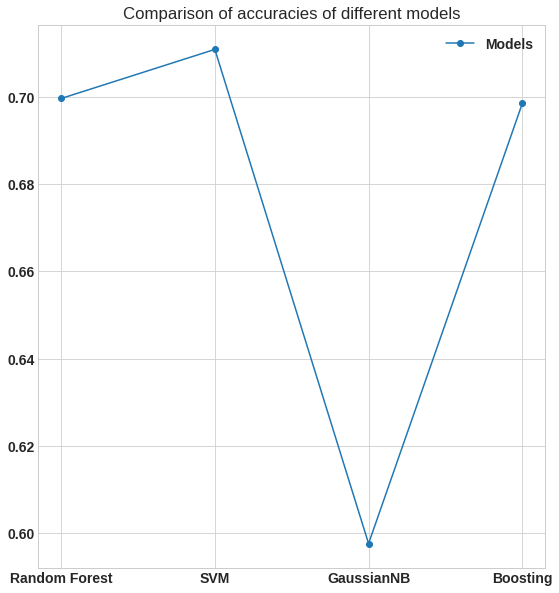

In [49]:
plt.figure(figsize = (20,10))
ax = plt.subplot(121)
plt.plot(Models,acc,marker='o')
plt.legend(labels = ['Models','Accuracy'])
plt.title('Comparison of accuracies of different models')

##Performing Cross-Validation

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import auc
from statistics import mean, stdev 
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
lst_accu_stratified = []
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()
for i, (train_index, test_index) in enumerate(skf.split(X, Y)): 
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    Y_train_fold, Y_test_fold = Y[train_index], Y[test_index] 
    knn.fit(X_train_fold, Y_train_fold) 
    lst_accu_stratified.append(knn.score(X_test_fold, Y_test_fold)*100)
    viz = plot_roc_curve(knn, X_test_fold, Y_test_fold,
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.show()
print('List of all accuracies obtained:', lst_accu_stratified) 
print('\nMaximum Accuracy that can be obtained from this model is:', 
      max(lst_accu_stratified), '%') 
print('\nMinimum Accuracy that can be obtained from this model is:', 
      min(lst_accu_stratified), '%') 
print('\nOverall Accuracy:', 
      mean(lst_accu_stratified), '%') 
print('\nStandard Deviation is:', stdev(lst_accu_stratified)) 